In [4]:
# clone the git repo
!git clone https://github.com/Nikhil29/Hackathon.git

Cloning into 'Hackathon'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 23 (delta 8), reused 20 (delta 7), pack-reused 0
Unpacking objects: 100% (23/23), done.
Checking out files: 100% (11/11), done.


In [0]:
# set the folder to use the ython files etc.
import sys
sys.path.append('/content/Hackathon')

In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [7]:
# Load the Red Wines dataset
path = '/content/Hackathon/data/01.xlsx';
data = pd.read_excel(path)

# Display the first five records
display(data.head(n=5))

,CBBC Code,CBBC Name,Trade Date,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,Trading Currency,Day High,Day Low,Closing Price,Volume,Turnover,Issuer,Underlying,Bull/Bear,CBBC Type,CBBC Category,Listing Date,Last Trading Date,Maturity Date,MCE,Strike/Call Currency,Strike Level,Call Level,Ent. Ratio^,Delisting Date**
0,57003,UB#HSI RC2010B,2019-01-31,380000.0,0.265,-80000.0,-0.275,2290000.0,1.15,200000000.0,HKD,0.265,0.265,0.270,460000.0,122700.0,UB,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,24038.0,24138.0,12000.0,-
1,57014,UB#TENCTRC1903U,2019-01-31,0.0,0.000,0.0,0.000,10000.0,0.03,40000000.0,HKD,0.000,0.000,0.920,0.0,0.0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100.0,2019-03-15 00:00:00
2,57015,JP#TENCTRC1902A,2019-01-31,0.0,0.000,0.0,0.000,1000.0,0.00,50000000.0,HKD,0.000,0.000,0.960,0.0,0.0,JP,700,Bull,Standard,R,2018-11-06,2019-02-14 00:00:00,2019-02-15,N,HKD,252.4,255.2,100.0,2019-02-18 00:00:00
3,57016,JP#HSI RC2009V,2019-01-31,150000.0,0.290,0.0,0.000,100000.0,0.05,200000000.0,HKD,0.295,0.280,0.295,150000.0,43500.0,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-09-29,N,-,24458.0,24558.0,10000.0,-
4,57017,JP#HSI RC2010E,2019-01-31,0.0,0.000,0.0,0.000,3290000.0,1.65,200000000.0,HKD,0.000,0.000,0.390,0.0,0.0,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,23358.0,23458.0,10000.0,-


In [22]:

display(data['CBBC Name'].unique().size)

4623

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64730 entries, 0 to 64729
Data columns (total 30 columns):
CBBC Code                            64730 non-null object
CBBC Name                            64723 non-null object
Trade Date                           64723 non-null datetime64[ns]
No. of CBBC Bought *                 64723 non-null float64
Average Price per CBBC Bought *      64723 non-null float64
No. of CBBC Sold *                   64723 non-null float64
Average Price per CBBC Sold *        64723 non-null float64
No. of CBBC still out in market *    64723 non-null float64
% of issue still out in market *     64723 non-null float64
Total Issue Size *                   64723 non-null float64
Trading Currency                     64723 non-null object
Day High                             64723 non-null float64
Day Low                              64723 non-null float64
Closing Price                        60257 non-null float64
Volume                               64723 non-

In [14]:
display(data.describe())

,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,Day High,Day Low,Closing Price,Volume,Turnover,Strike Level,Call Level,Ent. Ratio^
count,6.472300e+04,64723.000000,6.472300e+04,64723.000000,6.472300e+04,64723.000000,6.472300e+04,64723.000000,64723.000000,60257.000000,6.472300e+04,6.472300e+04,64723.000000,64723.000000,64723.000000
mean,2.657033e+07,0.089285,-2.687856e+07,-0.081195,5.232967e+06,3.923371,1.132520e+08,0.107604,0.097377,0.248421,5.725480e+07,3.424577e+06,9690.305946,9695.008751,4526.826476
std,2.323081e+08,0.143919,2.342412e+08,0.134407,1.810004e+07,11.077424,7.357759e+07,0.157292,0.150338,0.242206,4.789774e+08,2.560570e+07,12416.123750,12415.373788,5977.885662
min,0.000000e+00,0.000000,-6.883800e+09,-1.590000,0.000000e+00,0.000000,5.500000e+06,0.000000,0.000000,0.010000,0.000000e+00,0.000000e+00,2.400000,2.480000,10.000000
25%,0.000000e+00,0.000000,-1.200000e+06,-0.114805,0.000000e+00,0.000000,5.000000e+07,0.000000,0.000000,0.091000,0.000000e+00,0.000000e+00,57.580000,58.080000,100.000000
50%,1.000000e+04,0.025000,0.000000e+00,0.000000,2.500000e+05,0.290000,1.000000e+08,0.057000,0.044000,0.163000,8.000000e+04,1.306000e+04,264.000000,265.700000,100.000000
75%,1.257500e+06,0.125392,0.000000e+00,0.000000,2.174000e+06,2.355000,2.000000e+08,0.152000,0.135000,0.310000,2.970000e+06,3.980725e+05,24478.000000,24600.000000,10000.000000
max,6.751470e+09,1.520000,0.000000e+00,0.000000,2.500000e+08,100.000000,4.000000e+08,1.590000,1.590000,1.710000,1.383142e+10,6.551950e+08,32300.000000,32200.000000,20000.000000


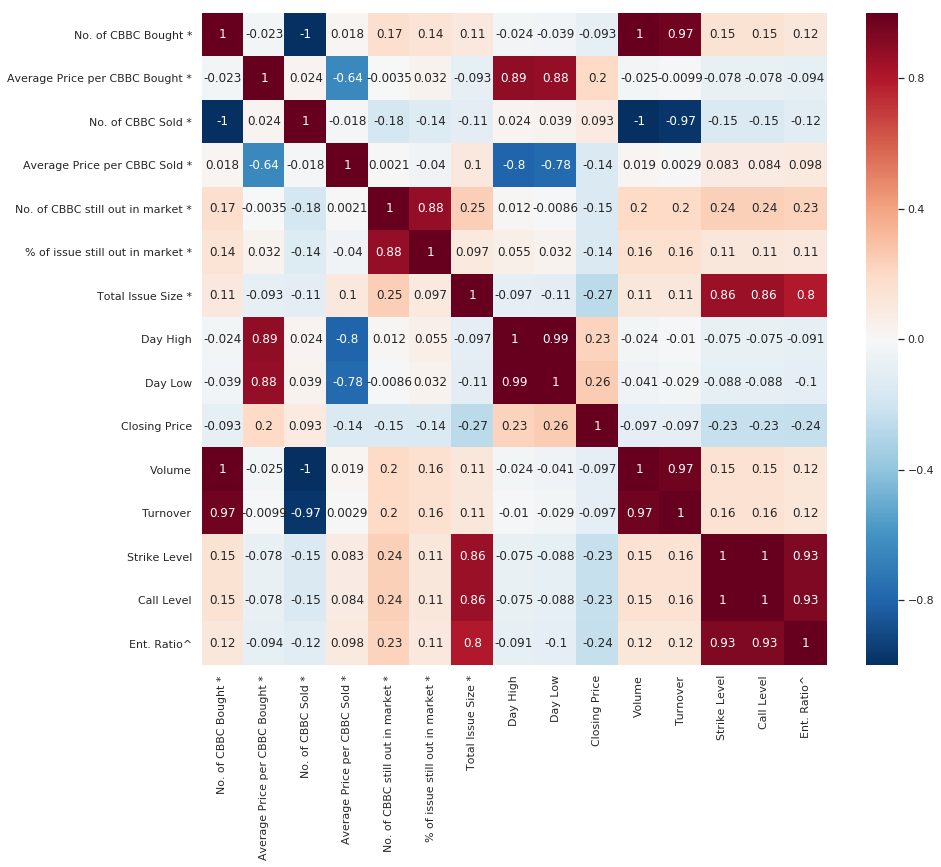

In [34]:
correlation = data.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")